<a href="https://colab.research.google.com/github/dorin133/Signal-Processing-236201-all-HW/blob/master/HW4_236201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import imageio
import math
import os
import numpy as np
from skimage import io, color
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure
from scipy.linalg import dft
from scipy.linalg import circulant
from numpy.linalg import matrix_rank
import numpy.linalg as linalg

In [ ]:
N=64
c=0.6
def generatePhi(N,c):
  M=np.random.normal(scale=np.sqrt(c))
  L=np.random.normal(scale=np.sqrt(N/2*(1-c)))
  K=np.random.randint(low=1,high=N//2+1)
  phi=np.ones((N))*M
  phi[K-1]+=L
  phi[K+N//2-1]+=L
  return phi
def generateSamples(size,N,c):
  philist = []
  for i in range(size):
    philist += [generatePhi(N,c)]
  samples=np.array(philist)
  return samples

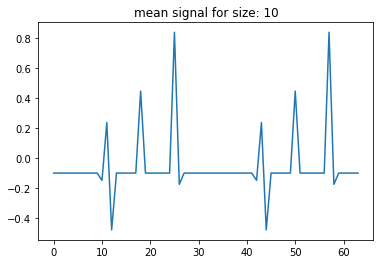

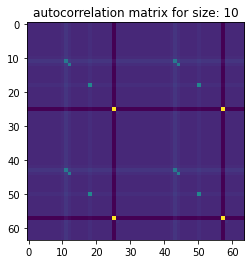

In [ ]:
#1.a generating samples
size=10
samples=generateSamples(size,N,c)
autocorr=samples.T@samples/size
mean=np.mean(samples,axis=0)
plt.plot(mean)
plt.title("mean signal for size: "+str(size))
plt.show()
_ = plt.imshow(autocorr)
_ = plt.title("autocorrelation matrix for size: "+str(size))

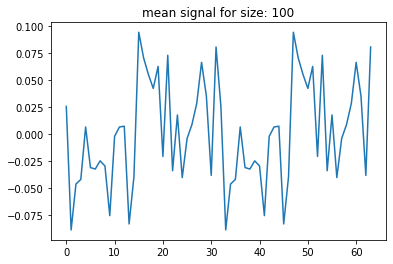

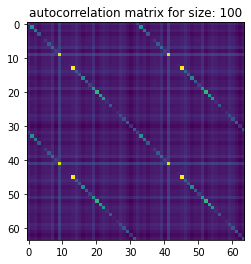

In [ ]:
size=100
samples=generateSamples(size,N,c)
autocorr=samples.T@samples/size
mean=np.mean(samples,axis=0)
plt.plot(mean)
plt.title("mean signal for size: "+str(size))
plt.show()
_ = plt.imshow(autocorr)
_ = plt.title("autocorrelation matrix for size: "+str(size))

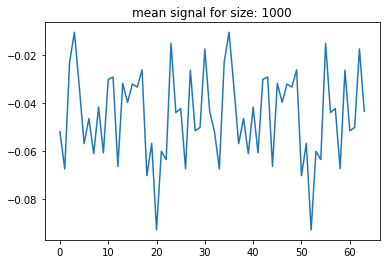

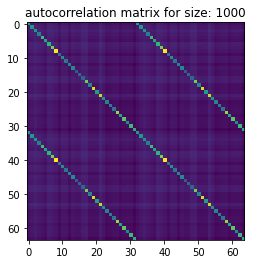

In [ ]:
size=1000
samples=generateSamples(size,N,c)
autocorr=samples.T@samples/size
mean=np.mean(samples,axis=0)
plt.plot(mean)
plt.title("mean signal for size: "+str(size))
plt.show()
_ = plt.imshow(autocorr)
_ = plt.title("autocorrelation matrix for size: "+str(size))

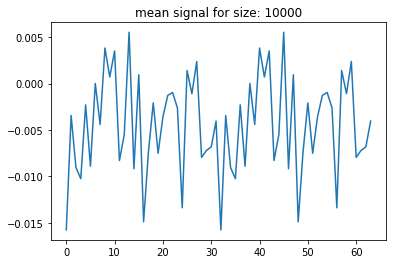

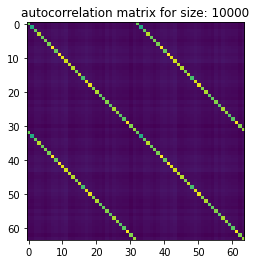

In [ ]:
size=10000
samples=generateSamples(size,N,c)
autocorr=samples.T@samples/size
mean=np.mean(samples,axis=0)
plt.plot(mean)
plt.title("mean signal for size: "+str(size))
plt.show()
_ = plt.imshow(autocorr)
_ = plt.title("autocorrelation matrix for size: "+str(size))

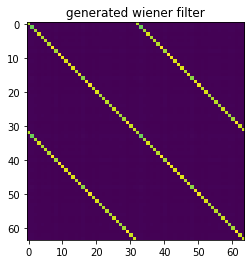

In [ ]:
#1.b constructing the wiener filter and generating noisy samples
wiener=autocorr@np.linalg.inv(autocorr+np.eye(N))
plt.imshow(wiener)
_ = plt.title("generated wiener filter")

In [ ]:
noise_mat=np.random.normal(size=samples.shape)
noisy_data=samples+noise_mat
reconstructed_data=(wiener@noisy_data.T).T

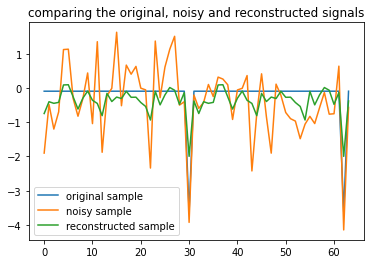

the mse for sample: 5 is: 0.19159972512611192


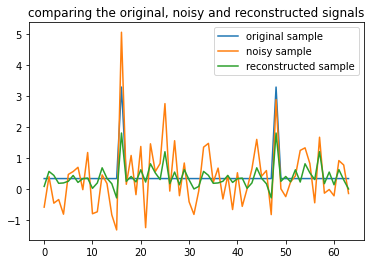

the mse for sample: 200 is: 0.14046339479897957


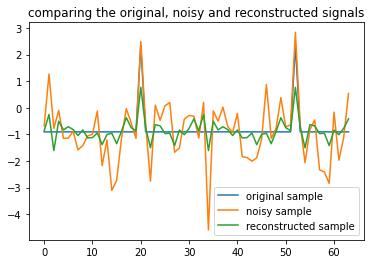

the mse for sample: 5012 is: 0.17646925227323035


In [ ]:
choice_samples=[5,200,5012]
for i in choice_samples:
  original_sample=samples[i,:]
  noisy_sample=noisy_data[i,:]
  reconstructed_sample=reconstructed_data[i,:]
  orig_plot, = plt.plot(original_sample,label="original sample")
  noisy_plot, = plt.plot(noisy_sample,label="noisy sample")
  reconstructed_plot, = plt.plot(reconstructed_sample,label="reconstructed sample")
  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title("comparing the original, noisy and reconstructed signals")
  _ = plt.show()
  mse=np.mean((reconstructed_sample-original_sample)**2)
  print("the mse for sample: "+str(i)+" is: "+str(mse))

In [ ]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.228893597482028


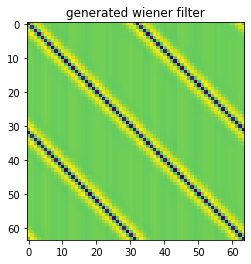

In [ ]:
#1.c repeating 1.b only this time multiplying the random original signals by H
circulant_col = np.zeros(N)
circulant_col[0] = -5/2
circulant_col[1] = 4/3
circulant_col[2] = -1/12
circulant_col[-1] = 4/3
circulant_col[-2] = -1/12

h_mat = circulant(circulant_col)
wiener=(autocorr@h_mat.T)@np.linalg.inv((h_mat@autocorr@h_mat.T)+np.eye(N))
plt.imshow(wiener)
_ = plt.title("generated wiener filter")

In [ ]:
noise_mat=np.random.normal(size=samples.shape)
filtered_noisy_data=samples@h_mat.T+noise_mat
reconstructed_data=(wiener@filtered_noisy_data.T).T

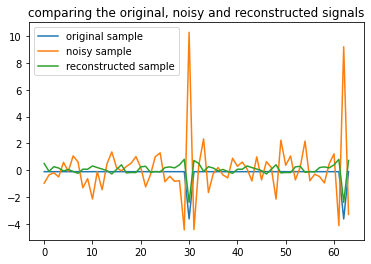

the mse for sample: 5 is: 0.16400458285753955


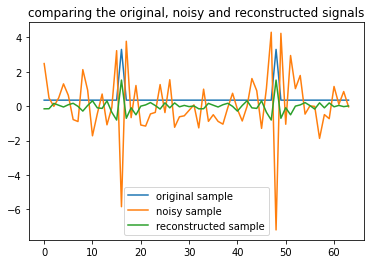

the mse for sample: 200 is: 0.3228039960410534


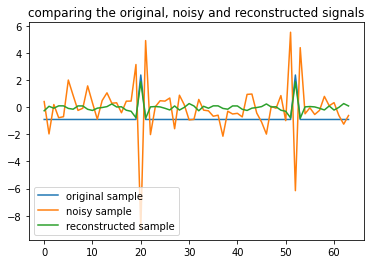

the mse for sample: 5012 is: 0.7266138941062816


In [ ]:
choice_samples=[5,200,5012]
for i in choice_samples:
  original_sample=samples[i,:]
  noisy_sample=filtered_noisy_data[i,:]
  reconstructed_sample=reconstructed_data[i,:]
  orig_plot, = plt.plot(original_sample,label="original sample")
  noisy_plot, = plt.plot(noisy_sample,label="noisy sample")
  reconstructed_plot, = plt.plot(reconstructed_sample,label="reconstructed sample")
  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title("comparing the original, noisy and reconstructed signals")
  _ = plt.show()
  mse=np.mean((reconstructed_sample-original_sample)**2)
  print("the mse for sample: "+str(i)+" is: "+str(mse))

In [ ]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.7511825164243828


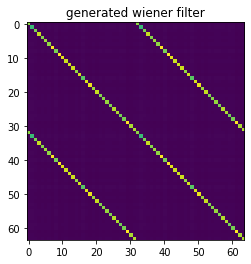

In [ ]:
#1.d constructing the wiener filter and generating noisy samples with the new sigma 
wiener=autocorr@np.linalg.inv(autocorr+5*np.eye(N))
plt.imshow(wiener)
_ = plt.title("generated wiener filter")

In [ ]:
noise_mat=np.random.normal(size=samples.shape, scale=np.sqrt(5))
noisy_data=samples+noise_mat
reconstructed_data=(wiener@noisy_data.T).T

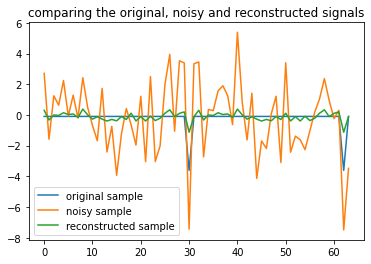

the mse for sample: 5 is: 0.24135603627963348


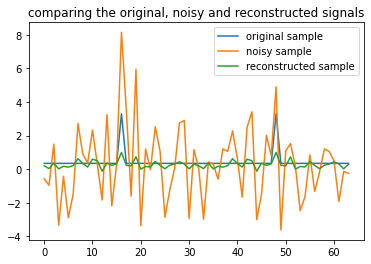

the mse for sample: 200 is: 0.209598661806276


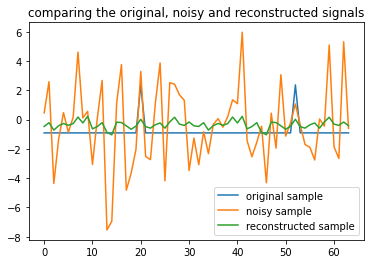

the mse for sample: 5012 is: 0.5333200819159203


In [ ]:
choice_samples=[5,200,5012]
for i in choice_samples:
  original_sample=samples[i,:]
  noisy_sample=noisy_data[i,:]
  reconstructed_sample=reconstructed_data[i,:]
  orig_plot, = plt.plot(original_sample,label="original sample")
  noisy_plot, = plt.plot(noisy_sample,label="noisy sample")
  reconstructed_plot, = plt.plot(reconstructed_sample,label="reconstructed sample")
  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title("comparing the original, noisy and reconstructed signals")
  _ = plt.show()
  mse=np.mean((reconstructed_sample-original_sample)**2)
  print("the mse for sample: "+str(i)+" is: "+str(mse))

In [ ]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.39996687930093505


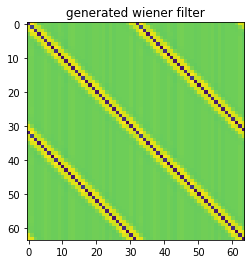

In [ ]:
#repeating only this time multiplying the random original signals by H (= h_mat)
circulant_col = np.zeros(N)
circulant_col[0] = -5/2
circulant_col[1] = 4/3
circulant_col[2] = -1/12
circulant_col[-1] = 4/3
circulant_col[-2] = -1/12

h_mat = circulant(circulant_col)
wiener=(autocorr@h_mat.T)@np.linalg.inv((h_mat@autocorr@h_mat.T)+5*np.eye(N))
plt.imshow(wiener)
_ = plt.title("generated wiener filter")

In [ ]:
noise_mat=np.random.normal(size=samples.shape)
filtered_noisy_data=samples@h_mat.T+noise_mat
reconstructed_data=(wiener@filtered_noisy_data.T).T

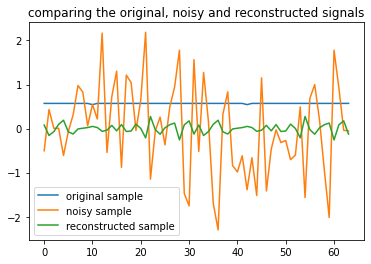

the mse for sample: 5 is: 0.33711459542742916


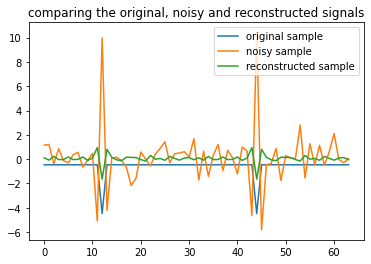

the mse for sample: 200 is: 0.6133945221266621


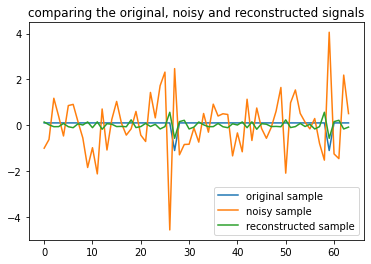

the mse for sample: 5012 is: 0.03687317807813241


In [ ]:
choice_samples=[5,200,5012]
for i in choice_samples:
  original_sample=samples[i,:]
  noisy_sample=filtered_noisy_data[i,:]
  reconstructed_sample=reconstructed_data[i,:]
  orig_plot, = plt.plot(original_sample,label="original sample")
  noisy_plot, = plt.plot(noisy_sample,label="noisy sample")
  reconstructed_plot, = plt.plot(reconstructed_sample,label="reconstructed sample")
  plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
  plt.title("comparing the original, noisy and reconstructed signals")
  _ = plt.show()
  mse=np.mean((reconstructed_sample-original_sample)**2)
  print("the mse for sample: "+str(i)+" is: "+str(mse))

In [ ]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.797312142716581


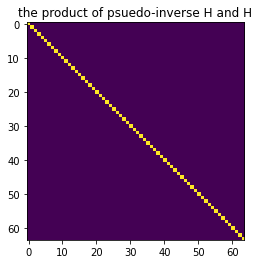

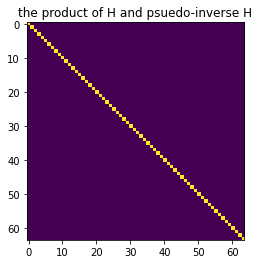

In [ ]:
# 1.e - psuedo-inverse calculation of H
h_mat_pinv = linalg.pinv(h_mat)

plt.imshow(h_mat_pinv@h_mat)
plt.title("the product of psuedo-inverse H and H")
plt.show()

plt.imshow(h_mat@h_mat_pinv)
plt.title("the product of H and psuedo-inverse H")
plt.show()

phi1 = np.ones(N)*32
phi2 = np.zeros(N)

hpinv_phi1 = h_mat_pinv@phi1
hpinv_phi2 = h_mat_pinv@phi2

In [ ]:
# calculating the 2-norm of the diff of phis and hpinv*phi
norm_phi_diff = np.sqrt((phi1-phi2)@(phi1-phi2))
print(norm_phi_diff)
norm_hphi_diff = np.sqrt((hpinv_phi1-hpinv_phi2)@(hpinv_phi1-hpinv_phi2))
print(norm_hphi_diff)

256.0
2.842579702233806e-09


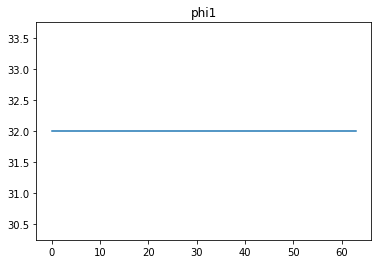

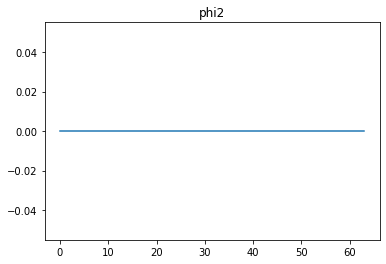

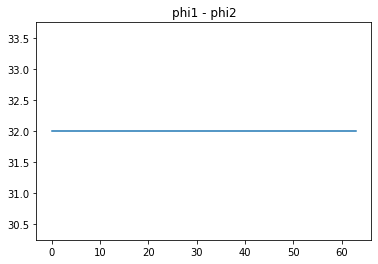

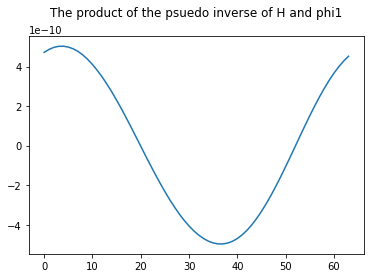

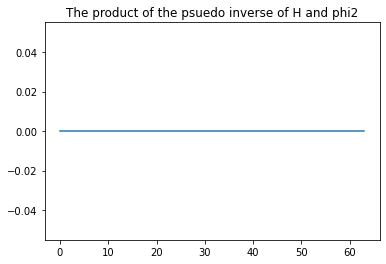

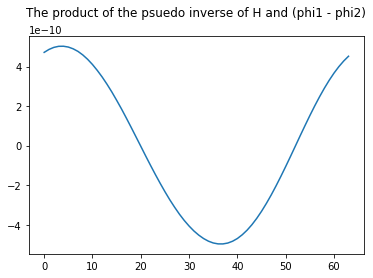

In [ ]:
# plotting phi1, phi2, phi1-phi2, hpinv_phi1-hpinv_phi2, hpinv_phi2, hpinv_phi1
plt.plot(phi1) 
plt.title("phi1")
plt.show()

plt.plot(phi2) 
plt.title("phi2")
plt.show()

plt.plot(phi1 - phi2) 
plt.title("phi1 - phi2")
plt.show()

plt.plot(hpinv_phi1) 
plt.title("The product of the psuedo inverse of H and phi1",pad =20)
plt.show()

plt.plot(hpinv_phi2) 
plt.title("The product of the psuedo inverse of H and phi2")
plt.show()

plt.plot(hpinv_phi1 - hpinv_phi2) 
plt.title("The product of the psuedo inverse of H and (phi1 - phi2)", pad =20)
plt.show()